In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

In [111]:
cleaned_houses = pd.read_csv("../Data/riyadh_houses_cleaned.csv")
extra_features = pd.read_csv("../Data/riyadh_houses_extra_features.csv")

In [112]:
cleaned_houses.head(3)

,title,size,price,bedrooms,bathrooms
0,فيلا للبيع في شارع الناقورة ، حي نمار ، الرياض,640.0,1800000.0,4.703128,4.0
1,فيلا للبيع في حي الياسمين ، الرياض,447.0,1460000.0,4.000000,4.0
2,فيلا للبيع في شارع الفيء ، حي الربيع ، الرياض,450.0,1750000.0,4.000000,5.0


In [113]:
extra_features.head(3)

,time_duration,neighborhood
0,7 days 00:00:00,نمار
1,0 days 00:01:00,الياسمين
2,1 days 00:00:00,الربيع


In [114]:
#connect the two dataframes 'cleaned_houses' & 'extra_features'
final_houses = pd.concat([cleaned_houses, extra_features], axis=1)

In [115]:
final_houses

,title,size,price,bedrooms,bathrooms,time_duration,neighborhood
0,فيلا للبيع في شارع الناقورة ، حي نمار ، الرياض,640.000000,1.800000e+06,4.703128,4.0,7 days 00:00:00,نمار
1,فيلا للبيع في حي الياسمين ، الرياض,447.000000,1.460000e+06,4.000000,4.0,0 days 00:01:00,الياسمين
2,فيلا للبيع في شارع الفيء ، حي الربيع ، الرياض,450.000000,1.750000e+06,4.000000,5.0,1 days 00:00:00,الربيع
3,فيلا للبيع في الرياض,336.000000,1.200000e+06,4.000000,5.0,91 days 06:00:00,طويق
4,فيلا للبيع في شارع وادي الساحل ، الرياض,373.000000,1.230000e+06,4.000000,4.0,0 days 13:00:00,الرمال
...,...,...,...,...,...,...,...
9969,فيلا للبيع في حي ظهرة لبن ، الرياض,300.000000,1.300000e+06,4.703128,5.0,0 days 22:00:00,لبن
9970,فيلا للبيع في حي الياسمين ، الرياض,360.000000,2.100000e+06,5.000000,5.0,0 days 08:00:00,الياسمين
9971,فيلا للبيع في طريق الملك عبدالعزيز ، الرياض,391.000000,1.600000e+06,5.000000,3.0,30 days 10:00:00,العارض
9972,فيلا للبيع في شارع حفصة بنت عمر ، حي الروضة ، ...,475.679968,1.895103e+06,5.000000,5.0,0 days 01:00:00,الروضة


In [116]:
#get the columns names as a list
new_columns = final_houses.columns.to_list()
new_columns

['title',
 'size',
 'price',
 'bedrooms',
 'bathrooms',
 'time_duration',
 'neighborhood']

In [117]:
def swap(list_, index1, index2):
    '''
    function to swap to elements in the list.
    
    return:
    new list with new order.
    '''
    list_[index1], list_[index2] = list_[index2], list_[index1]
    return list_


# rearrange the columns order
new_columns = swap(new_columns, 2, 6)
new_columns = swap(new_columns, 2, 1)
new_columns = swap(new_columns, 2, 5)
new_columns

['title',
 'neighborhood',
 'time_duration',
 'bedrooms',
 'bathrooms',
 'size',
 'price']

In [118]:
#set the final houses with new order of columns.
final_houses = final_houses[new_columns]
final_houses

,title,neighborhood,time_duration,bedrooms,bathrooms,size,price
0,فيلا للبيع في شارع الناقورة ، حي نمار ، الرياض,نمار,7 days 00:00:00,4.703128,4.0,640.000000,1.800000e+06
1,فيلا للبيع في حي الياسمين ، الرياض,الياسمين,0 days 00:01:00,4.000000,4.0,447.000000,1.460000e+06
2,فيلا للبيع في شارع الفيء ، حي الربيع ، الرياض,الربيع,1 days 00:00:00,4.000000,5.0,450.000000,1.750000e+06
3,فيلا للبيع في الرياض,طويق,91 days 06:00:00,4.000000,5.0,336.000000,1.200000e+06
4,فيلا للبيع في شارع وادي الساحل ، الرياض,الرمال,0 days 13:00:00,4.000000,4.0,373.000000,1.230000e+06
...,...,...,...,...,...,...,...
9969,فيلا للبيع في حي ظهرة لبن ، الرياض,لبن,0 days 22:00:00,4.703128,5.0,300.000000,1.300000e+06
9970,فيلا للبيع في حي الياسمين ، الرياض,الياسمين,0 days 08:00:00,5.000000,5.0,360.000000,2.100000e+06
9971,فيلا للبيع في طريق الملك عبدالعزيز ، الرياض,العارض,30 days 10:00:00,5.000000,3.0,391.000000,1.600000e+06
9972,فيلا للبيع في شارع حفصة بنت عمر ، حي الروضة ، ...,الروضة,0 days 01:00:00,5.000000,5.0,475.679968,1.895103e+06


---
## Question 1:
in any neighborhood, the most houses are expensive and in any neighborhood the most houses are cheap?

In [119]:
def get_most_neighborhood(agg_function):
    '''
    function to get the most min/max houses 
    '''
    neighborhoods_by_mean = final_houses.groupby('neighborhood').mean()
    filter_mask = neighborhoods_by_mean['price'] == neighborhoods_by_mean['price'].agg(agg_function)
    return neighborhoods_by_mean[filter_mask]



cheapest_neighborhood = get_most_neighborhood('min')
expensive_neighborhood = get_most_neighborhood('max')

In [120]:
cheapest_neighborhood

,bedrooms,bathrooms,size,price
neighborhood,,,,
اليمامة,4.4,4.0,325.0,366000.0


In [121]:
expensive_neighborhood

,bedrooms,bathrooms,size,price
neighborhood,,,,
الفلاح,4.540626,4.8,527.2,2.679021e+06


In [122]:
#map graph

## Answer 1:
cheapest neighborhood: اليمامة

the most expensive neighborhood: الفلاح

---
## Question 2:
are the bedrooms and bathrooms affect on the price?

In [123]:
final_houses.sample(10)

,title,neighborhood,time_duration,bedrooms,bathrooms,size,price
3007,فيلا للبيع في شارع زيد بن ثابت بن مقلد ، حي ال...,فهد,30 days 10:00:00,5.000000,5.0,465.000000,1.200000e+06
1089,فيلا للبيع في شارع علي عبدالله القضاعي ، حي ال...,الخزامى,0 days 04:00:00,5.000000,5.0,475.679968,1.895103e+06
441,فيلا للبيع في طريق أنس ابن مالك ، الرياض,الملقا,0 days 00:36:00,5.000000,5.0,312.000000,2.000000e+06
8258,فيلا للبيع في طريق الأمير محمد بن سعد بن عبدال...,حطين,3 days 00:00:00,5.000000,4.0,475.679968,1.895103e+06
1334,فيلا للبيع في شارع أبي بكر الشاشي ، الرياض,العارض,1 days 00:00:00,4.000000,5.0,312.000000,1.500000e+06
2450,فيلا للبيع في حي القيروان ، الرياض,القيروان,1 days 00:00:00,5.000000,5.0,300.000000,1.600000e+06
8393,فيلا للبيع في شارع النشرة ، حي الصحافة ، الرياض,الصحافة,0 days 09:00:00,4.000000,5.0,300.000000,1.350000e+06
1821,"فيلا للبيع في شارع الجفة, الملك فهد, الرياض",فهد,30 days 10:00:00,4.703128,5.0,485.000000,1.200000e+06
9160,فيلا للبيع في حي طويق ، الرياض,طويق,91 days 06:00:00,5.000000,5.0,240.000000,9.500000e+05
413,فيلا للبيع في المملكة العربية السعودية,المونسية,21 days 00:00:00,5.000000,5.0,300.000000,1.300000e+06


<AxesSubplot:>

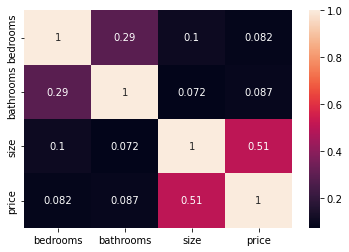

In [124]:
houses_corr = final_houses.corr()
sns.heatmap(data=houses_corr, annot=True)

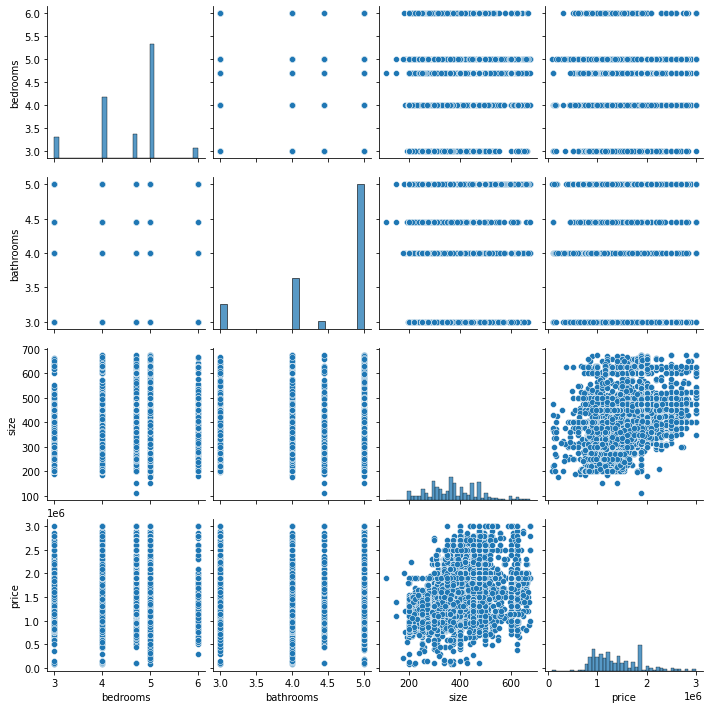

In [125]:
sns.pairplot(data=final_houses)

## Answer 2: 
No, it's not affect.

---
## Question 3:
can we predict the price of the house depending on the features we had or do we need more?

## Answer 3:
There is a small correlation between the size and the price, but it's not enough, we need more.

---
## Question 4:
in which neighborhood the most and least number of houses offers?

In [126]:
def get_most_houses_count(agg_function):
    '''
    function to get the most min/max houses 
    '''
    neighborhoods_by_counts = final_houses['neighborhood'].value_counts()
    filter_mask = neighborhoods_by_counts == neighborhoods_by_counts.agg(agg_function)
    return neighborhoods_by_counts[filter_mask]

min_neighborhood = get_most_houses_count('min')
max_neighborhood = get_most_houses_count('max')

In [127]:
min_neighborhood

سعود         1
غبيرة        1
الضباط       1
المصانع      1
الزهراء      1
الشرفية      1
والبحوث      1
الجرادية     1
الوشام       1
المؤتمرات    1
القري        1
عليشة        1
الوزارات     1
Name: neighborhood, dtype: int64

In [128]:
max_neighborhood

طويق    2106
Name: neighborhood, dtype: int64

In [129]:
#map graph

## Answer 4:
min houses: [سعود، غبيرة، الضباط، المصانع، الزهراء، الشرفية، البحوث، الجرادية، الوشام، المؤتمرات، القري، عليشة، الوزارات]

max house: طويق

---
## Question 5:
can we extract new information from 'details' to indicates the value of the house?

In [130]:
#To-Do

## Answer 5:
cooming soon...